# 8. Image Zooming and Shrinking

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ip= input("Enter image file name: ")

Enter image file name: ./Images/scenary.png


In [3]:
img= cv2.imread(ip, 0)
img.shape

(225, 225)

In [4]:
def zooming(img):
    new_img= np.zeros((img.shape[0]*2, img.shape[1]*2), dtype= 'uint8')
    for i in range(new_img.shape[0]):
        if i%2!= 0:
            continue
        for j in range(new_img.shape[1]-1):
            if j%2==0:
                new_img[i][j]= int(img[i//2][j//2])
            else:
                new_img[i][j]= (int(img[i//2][j//2])+ int(img[i//2][j//2 + 1]))//2
    for i in range(0, new_img.shape[0], 2):
        new_img[i][-1]= new_img[i][-2]//2
    new_img= new_img.T
    for i in range(new_img.shape[0]):
        for j in range(1, new_img.shape[1]-1, 2):
            new_img[i][j]= (int(new_img[i][j-1])+ int(new_img[i][j+1]))//2
    for i in range(0, new_img.shape[0]):
        new_img[i][-1]= new_img[i][-2]//2
    new_img= new_img.T
    return new_img

In [5]:
def shrinking(img):
    l=[]
    row= 0
    for i in range(0, img.shape[0], 2):
        l.append([])
        for j in range(0, img.shape[1], 2):
            l[row].append(img[i][j])
        l[row]= np.array(l[row], dtype= 'uint8')
        row+= 1
    l= np.array(l, dtype= 'uint8')
    return l

In [6]:
zoomed_img= zooming(img)

In [7]:
shrinked_img= shrinking(img)

In [8]:
zoomed_img.shape, img.shape, shrinked_img.shape

((450, 450), (225, 225), (113, 113))

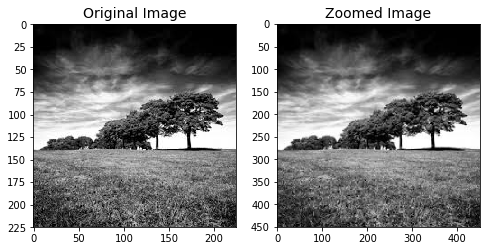

In [9]:
fig, ax= plt.subplots(ncols= 2, figsize= (8, 4))
fsize= 14

ax[0].set_title("Original Image", fontsize= fsize)
ax[0].imshow(img, cmap='gray')

ax[1].set_title("Zoomed Image", fontsize= fsize)
ax[1].imshow(zoomed_img, cmap='gray')

plt.show()

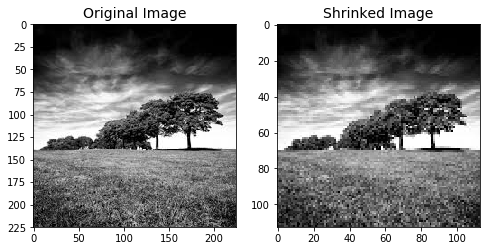

In [10]:
fig, ax= plt.subplots(ncols= 2, figsize= (8, 4))
fsize= 14

ax[0].set_title("Original Image", fontsize= fsize)
ax[0].imshow(img, cmap='gray')

ax[1].set_title("Shrinked Image", fontsize= fsize)
ax[1].imshow(shrinked_img, cmap='gray')

plt.show()

In [11]:
cv2.imshow('Zoomed', zoomed_img)
cv2.imshow('Original', img)
cv2.imshow('Shrinked', shrinked_img)
cv2.waitKey(0)
cv2.destroyAllWindows()